# Exploration

Let's move onto EDA second stage!

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
buys_df = pd.read_csv('/work/data/clean_buys.csv')
buys_df

,NUM BEN,BENEFICIARIO,RFC,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,110152,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LSS841015DV3,LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS
...,...,...,...,...,...,...,...,...,...,...,...
1535,203016,SEGOVIA PAEZ MARCELO,SEPM8603058S7,116033-158004-1689,NO APLICA,FINIQUITO 116033,CH,1104570.0,2020-12-11,183992.72,SERV. PERS.
1536,203016,SEGOVIA PAEZ MARCELO,SEPM8603058S7,116033-158004-1690,NO APLICA,FONDO PENSIONES 116033,CH,1104571.0,2020-12-11,56430.00,SERV. PERS.
1537,203016,TORRES ACOSTA ROBERTO CARLOS,TOAR8409234Y0,113052-158004-1725,NO APLICA,FONDO DE PENSIONES 113052,CH,299000183.0,2020-12-16,7425.00,SERV. PERS.
1538,203016,TOVAR CEDILLO JAVIER ALFONSO,TOCJ750710A31,23016-158004-1705,NO APLICA,PAGO 30% JUICIO DE AMPARO No. 673/2020 (DICIE...,CH,299000179.0,2020-12-15,4084.68,SERV. PERS.


# Dataset General Vision

In [17]:
buys_df.columns

Index(['NUM BEN', 'BENEFICIARIO', 'RFC', 'FACTURA', 'CONTRATO', 'CONCEPTO',
       'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [18]:
buys_df.dtypes

NUM BEN           int64
BENEFICIARIO     object
RFC              object
FACTURA          object
CONTRATO         object
CONCEPTO         object
TIPO             object
# OP            float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

Let's move forward & check the numerical variables

In [19]:
buys_df.describe()

,NUM BEN,# OP,IMPORTE
count,1540.000000,1.540000e+03,1.540000e+03
mean,203914.777273,1.920050e+08,6.263179e+05
std,92435.932025,1.411189e+08,4.666912e+06
min,110152.000000,1.019042e+06,8.600000e-01
25%,116223.000000,1.019144e+06,2.987000e+03
50%,203013.000000,2.980000e+08,1.235584e+04
75%,311250.000000,3.000001e+08,1.130583e+05
max,370012.000000,6.040001e+08,1.267303e+08


Let's consider which column should remain in order to perform future's model

In [20]:
buys_df = buys_df[['BENEFICIARIO', 'FACTURA', 'CONTRATO', 'CONCEPTO', 'TIPO', '# OP', 'FECHA', 'IMPORTE', 'SHEET']]

### Unidimensional Variable Analysis

Let's count a variable occurrence 

In [22]:
buys_df['SHEET'].value_counts()

CONTRATISTAS Y FDO FED    724
GASTOS VARIOS             690
COMUNICACION               71
SERV. PERS.                46
SERV PPROF                  9
Name: SHEET, dtype: int64

Since the desired outcome it's the value counted of "concepto" then, let's stored it within a list

In [23]:
list(buys_df['CONCEPTO'].value_counts())

[27,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 7,
 4,
 4,
 4,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [11]:
len(buys_df['CONCEPTO'].unique())

1396

In [12]:
buys_df['BENEFICIARIO'].value_counts()[0:10]

CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    266
AUTOKAM REGIOMONTANA,S.A.DE C.V.                      101
CAR ONE MONTERREY, S.A. DE C.V.                        78
PEREZ RIOS RAMIRO                                      58
S.I.M.E.P.R.O.D.E.                                     50
INTERASFALTOS, S.A. DE C.V.                            45
GRUPO COYOTE MONTERREY, S.A. DE C.V.                   43
SERVICIO TECNICO CHURUBUSCO, S.A. DE C.V.              30
CFE SUMINISTRADOR DE SERVICIOS BASICOS                 29
CORDERO MACIAS SILVESTRE GUADALUPE                     27
Name: BENEFICIARIO, dtype: int64

Let's now check column 'Importe' & it's behaviour

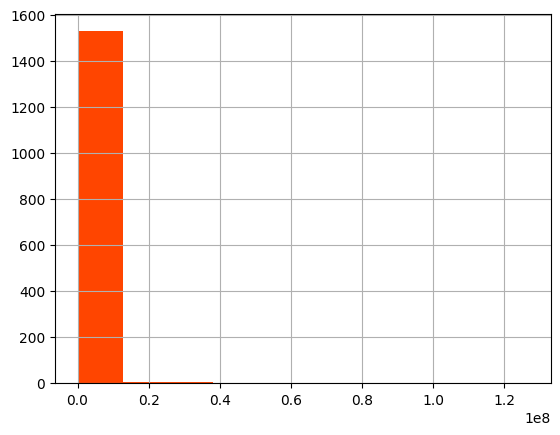

In [24]:
buys_df['IMPORTE'].hist(color='orangered')
plt.show()

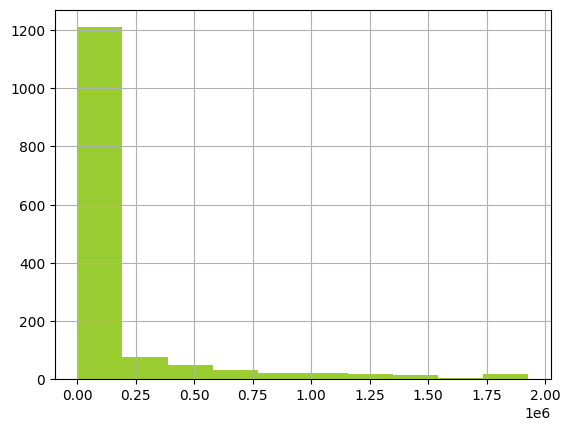

In [26]:
buys_df[buys_df['IMPORTE']< buys_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(color='yellowgreen')
plt.show()

a

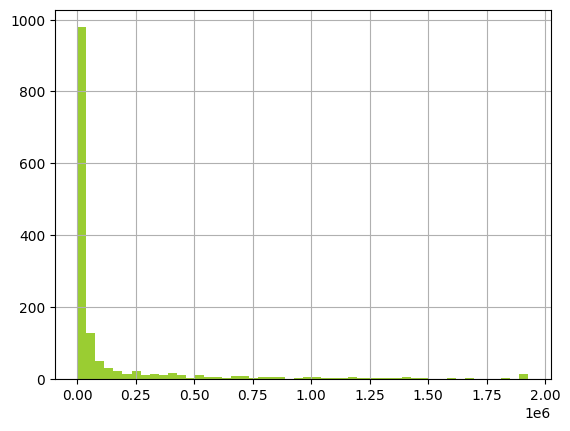

In [27]:
buys_df[buys_df['IMPORTE']< buys_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50, color='yellowgreen')
plt.show()

In [29]:
buys_df[buys_df['IMPORTE']< buys_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS


### Multidimensional Variable Analysis

In [34]:
beneficiary_amount_sum = buys_df.groupby('BENEFICIARIO').sum()['IMPORTE']

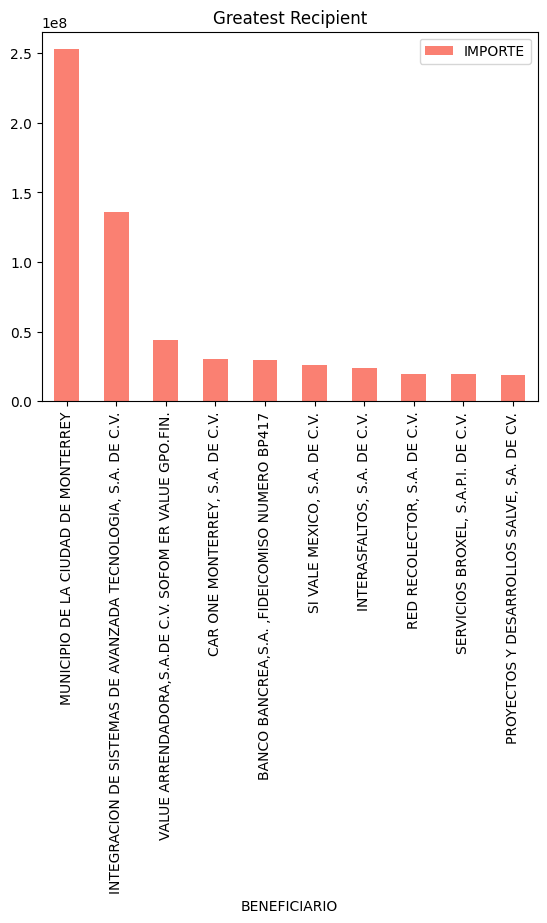

In [38]:
beneficiary_amount_sum.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE', color='salmon')
plt.title('Greatest Recipient')
plt.show()

Let's check the mean spending on sheet

In [42]:
mean_amount_sheet = buys_df.groupby('SHEET').mean()['IMPORTE']

In [45]:
mean_amount_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
2,GASTOS VARIOS,881659.731797
1,CONTRATISTAS Y FDO FED,474566.765787
3,SERV PPROF,229592.166667
0,COMUNICACION,109705.343662
4,SERV. PERS.,59623.405217


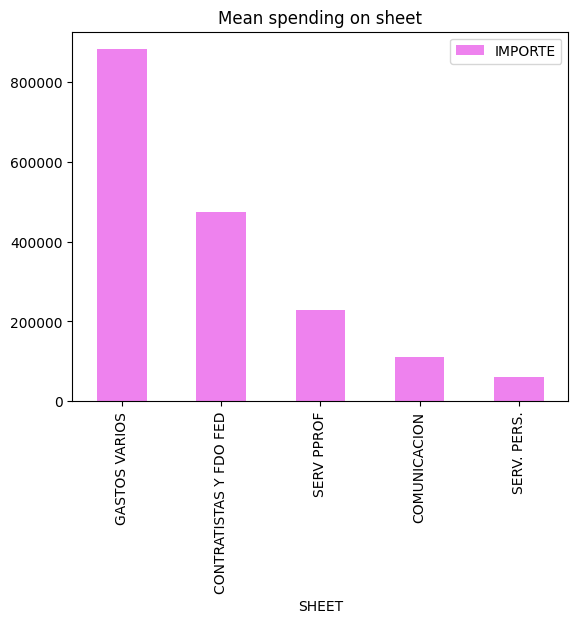

In [46]:
mean_amount_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE', color='violet')
plt.title('Mean spending on sheet')
plt.show()

Let's zoom in on Date's spending

In [48]:
date_amount_sum = buys_df.groupby('FECHA').sum()['IMPORTE']
date_amount_sum

FECHA
2020-12-01    2.453181e+04
2020-12-02    3.000000e+04
2020-12-03    1.313241e+05
2020-12-04    7.432247e+07
2020-12-07    1.815018e+06
2020-12-08    1.519824e+08
2020-12-09    4.659596e+05
2020-12-10    1.207010e+06
2020-12-11    1.127524e+08
2020-12-14    3.692338e+05
2020-12-15    1.826510e+04
2020-12-16    2.504067e+06
2020-12-17    1.735205e+08
2020-12-18    1.568875e+08
2020-12-21    9.441760e+05
2020-12-22    6.814845e+07
2020-12-23    3.328571e+07
2020-12-28    1.204764e+08
2020-12-29    2.050000e+05
2020-12-30    6.435889e+07
2020-12-31    1.080281e+06
Name: IMPORTE, dtype: float64

In [50]:
buys_spend_df = buys_df[buys_df['SHEET'] == 'GASTOS VARIOS']
buys_spend_df

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
0,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS AF8458-158008-3972,OT. 20204373,REEMPLAZO E INSTALACION DE AMORTIGUADORES (DEL...,TR,1019110.0,2020-12-11,14911.80,GASTOS VARIOS
1,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6916-158008-4041,OT. 20204425,REEMPLAZO E INSTALACION DE OCHO BIRLOS Y NUEVE...,TR,1019110.0,2020-12-11,2528.80,GASTOS VARIOS
2,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF6917-158008-3975,OT. 20204376,REEMPLAZO DE DOS RINES (17). PATRIMONIO 80383...,TR,1019110.0,2020-12-11,8500.02,GASTOS VARIOS
3,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7004-158008-3971,OT. 20204374,REEMPLAZO DE DOS RINES (14). PATRIMONIO 8007...,TR,1019110.0,2020-12-11,2400.01,GASTOS VARIOS
4,"LLANTAS Y SERVICIOS SERNA ANAHUAC,S.A. DE C.V.",LLS PF7137-158008-4554,OT. 20205130,REEMPLAZO E INSTALACION DE RIN 14. PATRIMONIO ...,TR,299001496.0,2020-12-23,1537.00,GASTOS VARIOS
...,...,...,...,...,...,...,...,...,...
685,"GS GAS Q, S.A. DE C.V.",BPLGK78471438-158003-5626,SAD-619-2020,CONSUMO DE GASOLINA DELA SEMANA 12 AL 18 DE OC...,TR,1019144.0,2020-12-18,510120.43,GASTOS VARIOS
686,"GS GAS Q, S.A. DE C.V.",BPLGK78471458-158003-5605,SAD-619-2020,CONSUMO DE GASOLINA DELA SEMANA 05 AL 11 DE OC...,TR,1019144.0,2020-12-18,668569.94,GASTOS VARIOS
687,"GS GAS Q, S.A. DE C.V.",BPLGK78471506-158003-5728,SAD-619-2020,CONSUMO DE DIESEL SEMANA DE 07 AL 13 DE SEPTIE...,TR,1019144.0,2020-12-18,276906.57,GASTOS VARIOS
688,"GS GAS Q, S.A. DE C.V.",BPLGK78471508-158003-5744,SAD-619-2020,CONSUMO DE GASOLINA DE LA SEMANA 7 AL 13 DE SE...,TR,1019144.0,2020-12-18,413735.30,GASTOS VARIOS


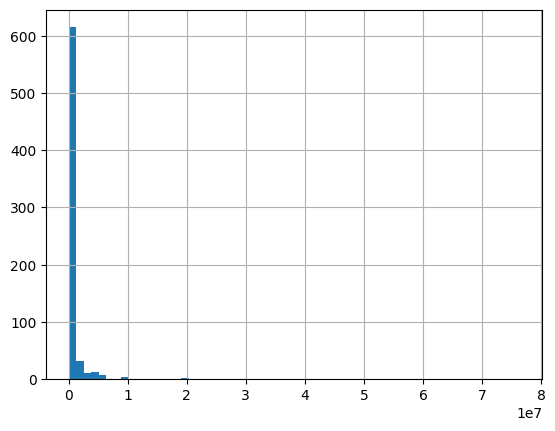

In [51]:
buys_spend_df['IMPORTE'].hist(bins=60)
plt.show()

Now! Let's perform when the recipient is Monterrey Municipality

In [54]:
buys_spend_df[buys_spend_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]

,BENEFICIARIO,FACTURA,CONTRATO,CONCEPTO,TIPO,# OP,FECHA,IMPORTE,SHEET
367,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-A-158004-1734,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCA ...",TR,11000196.0,2020-12-17,73864368.92,GASTOS VARIOS
368,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-B-158004-1735,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,231000103.0,2020-12-17,76352493.81,GASTOS VARIOS
369,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-23-C-158004-1733,NO APLICA,"PAGO DE NÓMINA PERIODO: 23-2020, BANCO: BANCO ...",TR,240000108.0,2020-12-17,19246138.70,GASTOS VARIOS
370,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1760,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCA ...",TR,11000197.0,2020-12-28,36101891.39,GASTOS VARIOS
371,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-A-158004-1780,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,11000198.0,2020-12-28,27443.46,GASTOS VARIOS
372,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1761,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,231000104.0,2020-12-28,33579364.01,GASTOS VARIOS
373,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-B-158004-1781,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,231000105.0,2020-12-28,132688.02,GASTOS VARIOS
374,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1759,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020, BANCO: BANCO ...",TR,240000109.0,2020-12-28,13362855.08,GASTOS VARIOS
375,MUNICIPIO DE LA CIUDAD DE MONTERREY,2020-24-C-158004-1779,NO APLICA,"PAGO DE NÓMINA PERIODO: 24-2020-E1, BANCO: BAN...",TR,240000110.0,2020-12-28,17925.96,GASTOS VARIOS
376,MUNICIPIO DE LA CIUDAD DE MONTERREY,158002-470,NO APLICA,FINIQUITO DE FONDO OPERATIVO DE LA SECRETARÍA ...,CH,299000198.0,2020-12-30,1439.20,GASTOS VARIOS


With the original dataset

In [56]:
buys_df[buys_df['BENEFICIARIO'] == "MUNICIPIO DE LA CIUDAD DE MONTERREY"]['SHEET'].value_counts()

GASTOS VARIOS             11
CONTRATISTAS Y FDO FED     5
Name: SHEET, dtype: int64

In [58]:
beneficiary_buys_sheet = buys_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')
beneficiary_buys_sheet

SHEET,COMUNICACION,CONTRATISTAS Y FDO FED,GASTOS VARIOS,SERV PPROF,SERV. PERS.
BENEFICIARIO,,,,,
"235 PROYECTOS, S.A. DE C.V.",NaN,NaN,1649292.36,NaN,NaN
"ABC Y CONSTRUCCIONES, SA. DE CV.",NaN,1311087.9,NaN,NaN,NaN
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",NaN,NaN,5914.30,NaN,NaN
"ADQUISICIONES INTELIGENTES, S.A. DE C.V.",NaN,2132196.0,NaN,NaN,NaN
"ALIANZA AUTOMOTRIZ RIVERO, SA. DE CV.",NaN,NaN,450859.52,NaN,NaN
...,...,...,...,...,...
VILLARREAL CARDENAS JUAN IGNACIO,NaN,NaN,NaN,NaN,3733.13
VILLARREAL CARDENAS NANCY ESTHER,NaN,NaN,NaN,NaN,81461.14
VILLARREAL DE LEON BERTHA,NaN,NaN,11004.05,NaN,NaN


In [61]:
top_beneficiaries = buys_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

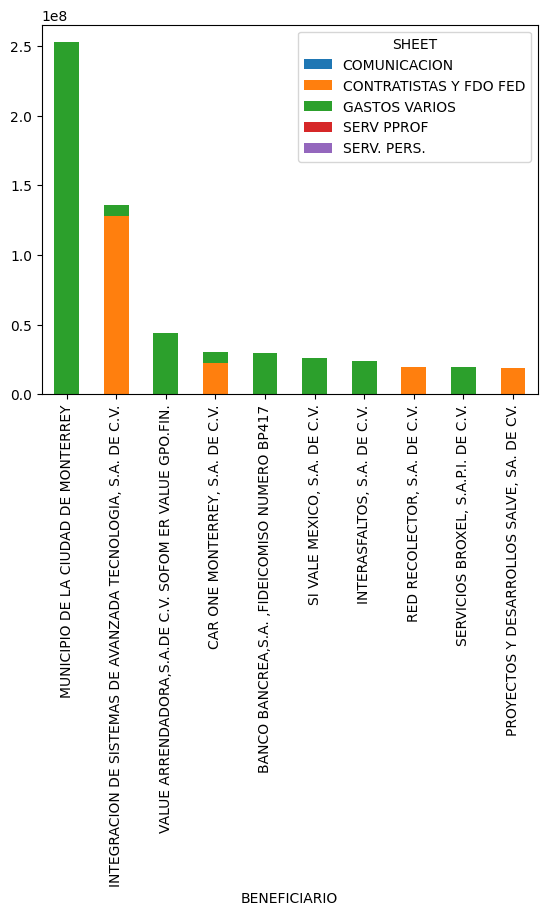

In [62]:
beneficiary_buys_sheet.loc[top_beneficiaries].plot.bar(stacked=True)
plt.show()

### Text Analysis

- Word Cloud Analysis

In [64]:
import nltk
from nltk.corpus import stopwords

In [67]:
nltk.download('stopwords')
stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [68]:
buy_text = ''
for row in buys_df['CONCEPTO']: buy_text = buy_text + ' ' + row

In [69]:
stopwords_list = stopwords.words('spanish') + ['2020', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [75]:
buy_text = ' '.join([x for x in buy_text.strip().lower().split(' ') if x not in stopwords_list and len(x) > 4])

In [76]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

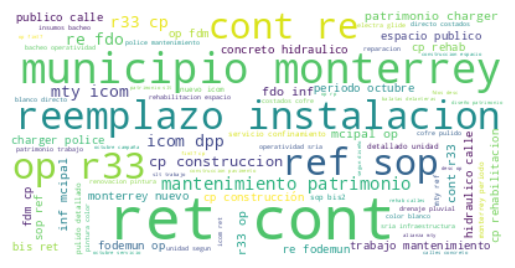

In [77]:
wc = WordCloud(background_color='white')
wc.generate(buy_text)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show(close=None, block=None)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a87f5222-8f82-4f1e-bb77-44a63aa36742' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>